In [1]:
import requests
import pandas as pd
import numpy as np
api = 'http://ergast.com/api/f1/2008/5/results.json'
resp = requests.get(api).json()

def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/results.json'.format(year, season_number)
    data = requests.get(api).json()
                                         #resp.get('MRData').get('RaceTable').get('Races')[0].get('Results')
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('Results'))
    circuit=data.get('MRData').get('RaceTable').get('Races')[0].get('Circuit')
    temp_df['circuit_name']=circuit.get('circuitName')
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

results = []
seasons = np.arange(2003,2018,1)
rounds = np.arange(1,15,1)
for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

out = pd.concat(results, axis=0)
out['driver_id']=out.Driver.map(lambda x: x.get('driverId'))
out['car_make']=out.Constructor.map(lambda x: x.get('name'))
out['driver_nat']=out.Driver.map(lambda x: x.get('nationality'))

df=out[['driver_id','year','seasonNbr','position','status','car_make','driver_nat','points','circuit_name']]
df['points'] = df['points'].astype(float)
df.head()

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,driver_id,year,seasonNbr,position,status,car_make,driver_nat,points,circuit_name
0,coulthard,2003,1,1,Finished,McLaren,British,10.0,Albert Park Grand Prix Circuit
1,montoya,2003,1,2,Finished,Williams,Colombian,8.0,Albert Park Grand Prix Circuit
2,raikkonen,2003,1,3,Finished,McLaren,Finnish,6.0,Albert Park Grand Prix Circuit
3,michael_schumacher,2003,1,4,Finished,Ferrari,German,5.0,Albert Park Grand Prix Circuit
4,trulli,2003,1,5,Finished,Renault,Italian,4.0,Albert Park Grand Prix Circuit


In [125]:
import requests
import pandas as pd
import numpy as np
api = 'http://ergast.com/api/f1/2008/1/results.json'
resp = requests.get(api).json()

def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/results.json'.format(year, season_number)
    data = requests.get(api).json()
                                         #resp.get('MRData').get('RaceTable').get('Races')[0].get('Results')
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('Results'))
    circuit=data.get('MRData').get('RaceTable').get('Races')[0].get('Circuit')
    temp_df['circuit_name']=circuit.get('circuitName')
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

_resp = get_race_result(18, 2011)
#print(_resp)
#years = [2008, 2009, 2010, 2011]
#seasons = [1,2,3,4,5]
results = []
seasons = np.arange(2003,2018,1)
rounds = np.arange(1,15,1)
for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)
        

# df = pd.DataFrame.from_records(_resp)
# df['driver'] = df.Driver.map(lambda x: x.get('driverId'))
# df.head()
out = pd.concat(results, axis=0)
out['driver_id']=out.Driver.map(lambda x: x.get('driverId'))
out.head()



C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Constructor,Driver,FastestLap,Time,circuit_name,grid,laps,number,points,position,positionText,seasonNbr,status,year,driver_id
0,"{'constructorId': 'mclaren', 'url': 'http://en...","{'driverId': 'coulthard', 'code': 'COU', 'url'...",NaN,"{'millis': '5682100', 'time': '1:34:42.1'}",Albert Park Grand Prix Circuit,11,58,5,10,1,1,1,Finished,2003,coulthard
1,"{'constructorId': 'williams', 'url': 'http://e...","{'driverId': 'montoya', 'code': 'MON', 'url': ...",NaN,"{'millis': '5690775', 'time': '+8.675'}",Albert Park Grand Prix Circuit,3,58,3,8,2,2,1,Finished,2003,montoya
2,"{'constructorId': 'mclaren', 'url': 'http://en...","{'driverId': 'raikkonen', 'permanentNumber': '...",NaN,"{'millis': '5691292', 'time': '+9.192'}",Albert Park Grand Prix Circuit,15,58,6,6,3,3,1,Finished,2003,raikkonen
3,"{'constructorId': 'ferrari', 'url': 'http://en...","{'driverId': 'michael_schumacher', 'code': 'MS...",NaN,"{'millis': '5691582', 'time': '+9.482'}",Albert Park Grand Prix Circuit,1,58,1,5,4,4,1,Finished,2003,michael_schumacher
4,"{'constructorId': 'renault', 'url': 'http://en...","{'driverId': 'trulli', 'code': 'TRU', 'url': '...",NaN,"{'millis': '5720901', 'time': '+38.801'}",Albert Park Grand Prix Circuit,12,58,7,4,5,5,1,Finished,2003,trulli


In [127]:
out['driver_id']=out.Driver.map(lambda x: x.get('driverId'))
out['car_make']=out.Constructor.map(lambda x: x.get('name'))
out['driver_nat']=out.Driver.map(lambda x: x.get('nationality'))
#out['avg_speed']=out.FastestLap.map(lambda x: x.get('AverageSpeed').get('speed'))
out.head()
temp=resp.get('MRData').get('RaceTable').get('Races')[0].get('Results')[0]
# temp['FastestLap']['']
#a=list(out["FastestLap"])[0]
# out['Speed']=out.FastestLap.map(lambda x: x['AverageSpeed']['speed'])
#out.head()
#a=out.dropna(subset=['FastestLap'])
a=out
#for i in out["FastestLap"]:
    #if type(i)!=dict:
        #print(i)
#a['Top_Speed']=a.FastestLap.map(lambda x: x['AverageSpeed']['speed'])
#a['tot_time']=a.Time.map(lambda x: x.get('time'))
df=a[['driver_id','year','seasonNbr','position','status','car_make','driver_nat','points','circuit_name']]
df

,driver_id,year,seasonNbr,position,status,car_make,driver_nat,points,circuit_name
0,coulthard,2003,1,1,Finished,McLaren,British,10,Albert Park Grand Prix Circuit
1,montoya,2003,1,2,Finished,Williams,Colombian,8,Albert Park Grand Prix Circuit
2,raikkonen,2003,1,3,Finished,McLaren,Finnish,6,Albert Park Grand Prix Circuit
3,michael_schumacher,2003,1,4,Finished,Ferrari,German,5,Albert Park Grand Prix Circuit
4,trulli,2003,1,5,Finished,Renault,Italian,4,Albert Park Grand Prix Circuit
5,frentzen,2003,1,6,Finished,Sauber,German,3,Albert Park Grand Prix Circuit
6,alonso,2003,1,7,Finished,Renault,Spanish,2,Albert Park Grand Prix Circuit
7,ralf_schumacher,2003,1,8,Finished,Williams,German,1,Albert Park Grand Prix Circuit
8,villeneuve,2003,1,9,Finished,BAR,Canadian,0,Albert Park Grand Prix Circuit
9,button,2003,1,10,Finished,BAR,British,0,Albert Park Grand Prix Circuit


In [124]:
df['points'] = df['points'].astype(float)
df['position'] = df['position'].astype(float)
#df.loc[df['position'] == 1]
#(len(df.loc[df['driver_id']=='alonso']))
#df.loc[(df['year']==2003) & (df['driver_id']=='firman')]
g=df.groupby(['driver_id']).year.agg('count')>=100 
list(g)
#print(g)
from itertools import compress
list(compress(y, g))

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['alonso',
 'barrichello',
 'button',
 'hamilton',
 'heidfeld',
 'massa',
 'raikkonen',
 'rosberg',
 'trulli',
 'vettel',
 'webber']

In [123]:
df.loc[df['position'].isin(['1','2','3','4','5'])]

,driver_id,year,seasonNbr,position,status,car_make,driver_nat,points,circuit_name
0,coulthard,2003,1,1.0,Finished,McLaren,British,10.0,Albert Park Grand Prix Circuit
1,montoya,2003,1,2.0,Finished,Williams,Colombian,8.0,Albert Park Grand Prix Circuit
2,raikkonen,2003,1,3.0,Finished,McLaren,Finnish,6.0,Albert Park Grand Prix Circuit
3,michael_schumacher,2003,1,4.0,Finished,Ferrari,German,5.0,Albert Park Grand Prix Circuit
4,trulli,2003,1,5.0,Finished,Renault,Italian,4.0,Albert Park Grand Prix Circuit
0,raikkonen,2003,2,1.0,Finished,McLaren,Finnish,10.0,Sepang International Circuit
1,barrichello,2003,2,2.0,Finished,Ferrari,Brazilian,8.0,Sepang International Circuit
2,alonso,2003,2,3.0,Finished,Renault,Spanish,6.0,Sepang International Circuit
3,ralf_schumacher,2003,2,4.0,Finished,Williams,German,5.0,Sepang International Circuit
4,trulli,2003,2,5.0,+1 Lap,Renault,Italian,4.0,Sepang International Circuit


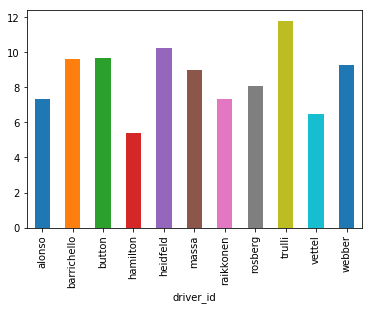

In [126]:
import matplotlib.pyplot as plt
new=df.loc[df['driver_id'].isin(['alonso','barrichello','button','hamilton','heidfeld','massa','raikkonen','rosberg','trulli','vettel','webber'])]
new.groupby(['driver_id']).position.agg('mean').plot.bar()


AxesSubplot(0.125,0.125;0.775x0.755)


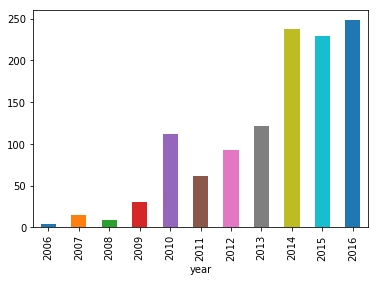

In [122]:
old=df.loc[df['driver_id']=='rosberg']
print(old.groupby(['year']).points.agg('sum').plot.bar())

AxesSubplot(0.125,0.125;0.775x0.755)


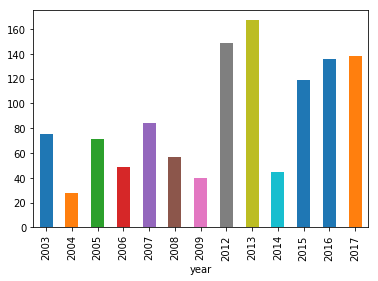

In [121]:
old2=df.loc[df['driver_id']=='raikkonen']
print(old2.groupby(['year']).points.agg('sum').plot.bar())

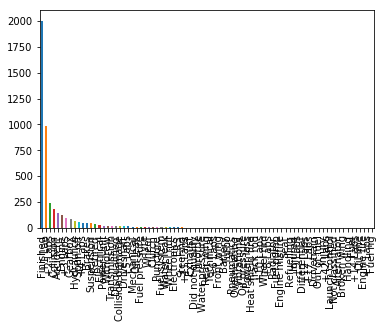

In [107]:
import matplotlib.pyplot as plt
df['status'].value_counts().plot.bar()

In [95]:
a=list(df['driver_id'])
b=set(a)
z=list(b)
y=sorted(z)
y

['albers',
 'alguersuari',
 'alonso',
 'ambrosio',
 'badoer',
 'barrichello',
 'baumgartner',
 'bottas',
 'bourdais',
 'bruni',
 'bruno_senna',
 'buemi',
 'button',
 'chandhok',
 'chilton',
 'coulthard',
 'davidson',
 'doornbos',
 'ericsson',
 'firman',
 'fisichella',
 'frentzen',
 'friesacher',
 'garde',
 'gene',
 'giovinazzi',
 'glock',
 'grassi',
 'grosjean',
 'gutierrez',
 'hamilton',
 'haryanto',
 'heidfeld',
 'hulkenberg',
 'ide',
 'jolyon_palmer',
 'jules_bianchi',
 'karthikeyan',
 'kevin_magnussen',
 'kiesa',
 'klien',
 'kobayashi',
 'kovalainen',
 'kubica',
 'kvyat',
 'liuzzi',
 'lotterer',
 'maldonado',
 'markus_winkelhock',
 'massa',
 'matta',
 'max_verstappen',
 'merhi',
 'michael_schumacher',
 'montagny',
 'monteiro',
 'montoya',
 'nakajima',
 'nasr',
 'ocon',
 'panis',
 'pantano',
 'perez',
 'petrov',
 'pic',
 'piquet_jr',
 'pizzonia',
 'raikkonen',
 'ralf_schumacher',
 'resta',
 'ricciardo',
 'rosa',
 'rosberg',
 'rossi',
 'sainz',
 'sato',
 'speed',
 'stevens',
 'stroll

In [73]:
resp

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.4',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/2008/1/results.json',
  'limit': '30',
  'offset': '0',
  'total': '22',
  'RaceTable': {'season': '2008',
   'round': '1',
   'Races': [{'season': '2008',
     'round': '1',
     'url': 'http://en.wikipedia.org/wiki/2008_Australian_Grand_Prix',
     'raceName': 'Australian Grand Prix',
     'Circuit': {'circuitId': 'albert_park',
      'url': 'http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit',
      'circuitName': 'Albert Park Grand Prix Circuit',
      'Location': {'lat': '-37.8497',
       'long': '144.968',
       'locality': 'Melbourne',
       'country': 'Australia'}},
     'date': '2008-03-16',
     'time': '04:30:00Z',
     'Results': [{'number': '22',
       'position': '1',
       'positionText': '1',
       'points': '10',
       'Driver': {'driverId': 'hamilton',
        'permanentNumber': '44',
        'code': 'HAM',
        'url': 'http://en.wikipedia.org/wiki/L

In [122]:
out['Driver']

0     {'driverId': 'coulthard', 'code': 'COU', 'url'...
1     {'driverId': 'montoya', 'code': 'MON', 'url': ...
2     {'driverId': 'raikkonen', 'permanentNumber': '...
3     {'driverId': 'michael_schumacher', 'code': 'MS...
4     {'driverId': 'trulli', 'code': 'TRU', 'url': '...
5     {'driverId': 'frentzen', 'url': 'http://en.wik...
6     {'driverId': 'alonso', 'permanentNumber': '14'...
7     {'driverId': 'ralf_schumacher', 'code': 'SCH',...
8     {'driverId': 'villeneuve', 'code': 'VIL', 'url...
9     {'driverId': 'button', 'permanentNumber': '22'...
10    {'driverId': 'verstappen', 'url': 'http://en.w...
11    {'driverId': 'fisichella', 'code': 'FIS', 'url...
12    {'driverId': 'pizzonia', 'code': 'PIZ', 'url':...
13    {'driverId': 'panis', 'url': 'http://en.wikipe...
14    {'driverId': 'heidfeld', 'code': 'HEI', 'url':...
15    {'driverId': 'wilson', 'url': 'http://en.wikip...
16    {'driverId': 'webber', 'code': 'WEB', 'url': '...
17    {'driverId': 'matta', 'url': 'http://en.wi